In [1]:
# Gerekli kütüphaneleri içe aktarıyoruz.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest

In [70]:
n_samples = 1000
outliers_fraction = 0.01

In [71]:
n_outliers = int(outliers_fraction * n_samples)

In [72]:
n_outliers

10

In [73]:
n_inliers = n_samples - n_outliers

In [74]:
n_inliers

990

In [75]:
params = dict(random_state=0, n_samples=n_inliers, n_features=2)

In [76]:
params

{'random_state': 0, 'n_samples': 990, 'n_features': 2}

In [77]:
X = make_blobs(centers=[[0, 0], [0, 0]], 
               cluster_std=0.05,
               **params)[0]

In [78]:
X

array([[ 0.08820262,  0.02000786],
       [-0.02827489,  0.02380157],
       [ 0.01036354,  0.01538663],
       ...,
       [ 0.02882954, -0.01041494],
       [-0.08069489, -0.01063701],
       [ 0.00796252, -0.09792745]])

In [79]:
rng = np.random.RandomState(42)

In [80]:
X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

In [81]:
iForest = IsolationForest(n_estimators=10, verbose=2)
iForest.fit(X)

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


IsolationForest(n_estimators=10, verbose=2)

In [82]:
pred = iForest.predict(X)

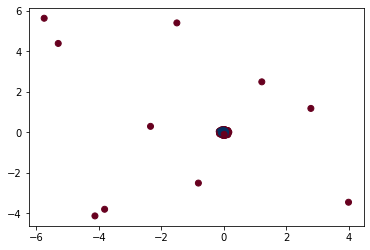

In [83]:
plt.scatter(X[:, 0], X[:, 1], c=pred, cmap='RdBu');

In [84]:
pred_scores = -1*iForest.score_samples(X)

In [85]:
pred_scores

array([0.52664848, 0.37275386, 0.38333897, 0.4300854 , 0.38055549,
       0.41414288, 0.54143764, 0.38772949, 0.47746767, 0.55377612,
       0.38327714, 0.41986936, 0.53340752, 0.41517534, 0.37415816,
       0.379348  , 0.49036561, 0.4039598 , 0.39855399, 0.46193953,
       0.41531252, 0.42998414, 0.42183986, 0.39251415, 0.43957118,
       0.3801144 , 0.49275613, 0.41480759, 0.44018311, 0.38695114,
       0.38244054, 0.44467609, 0.36645878, 0.41434335, 0.37112764,
       0.39251415, 0.44335373, 0.37608289, 0.38220681, 0.36472299,
       0.4807091 , 0.38846192, 0.38776415, 0.48204725, 0.45077894,
       0.40381689, 0.55653409, 0.38849855, 0.43217893, 0.36647241,
       0.40981149, 0.36629543, 0.39893951, 0.37486265, 0.51914334,
       0.57502784, 0.39855399, 0.45189488, 0.40526113, 0.47067154,
       0.48146126, 0.49351256, 0.36339775, 0.50403025, 0.37953719,
       0.43883314, 0.56083527, 0.48941255, 0.36974763, 0.5062373 ,
       0.37476477, 0.38040586, 0.46220805, 0.44874112, 0.54143

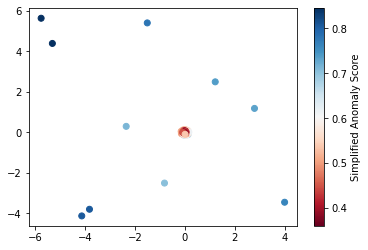

In [88]:
plt.scatter(X[:, 0], X[:, 1], c=pred_scores, cmap='RdBu')
plt.colorbar(label='Simplified Anomaly Score');
